In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

2024-06-20 20:43:22.088018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 20:43:22.088128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 20:43:22.352884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths
data_dir = '/kaggle/input/arstbdsl/data'
img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator instances for train, validation, and test sets with augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into 80% train and 20% validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 9504 images belonging to 38 classes.
Found 2360 images belonging to 38 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, InceptionV3, ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Function to build a single model
def build_model(base_model, model_name):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(38, activation='softmax')(x)  # Assuming 38 classes
    
    model = Model(inputs, outputs, name=model_name)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load pre-trained models
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build and compile each model separately
model_1 = build_model(xception_model, model_name='Xception_Model')
model_2 = build_model(inception_model, model_name='InceptionV3_Model')
model_3 = build_model(resnet_model, model_name='ResNet50_Model')
model_4 = build_model(efficientnet_model, model_name='EfficientNetB0_Model')

# Optionally, you can print summaries of each model to inspect their architecture
model_1.summary()
model_2.summary()
model_3.summary()
model_4.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "Xception_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,998,606 (87.73 MB)

 Trainable params: 22,944,078 (87.52 MB)

 Non-trainable params: 54,528 (213.00 KB)

Model: "InceptionV3_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,939,910 (91.32 MB)

 Trainable params: 23,905,478 (91.19 MB)

 Non-trainable params: 34,432 (134.50 KB)

Model: "ResNet50_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,724,838 (98.13 MB)

 Trainable params: 25,671,718 (97.93 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "EfficientNetB0_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,400,265 (20.60 MB)

 Trainable params: 5,358,242 (20.44 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Train the model
history = model_1.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_2.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_3.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)
# Train the model
history = model_4.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


I0000 00:00:1718916322.297034     141 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718916322.375550     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.0375 - loss: 3.6517

W0000 00:00:1718916503.453821     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718916532.632247     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 302s 710ms/step - accuracy: 0.0376 - loss: 3.6516 - val_accuracy: 0.0928 - val_loss: 3.5276 - learning_rate: 1.0000e-05
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 477ms/step - accuracy: 0.1508 - loss: 3.3415 - val_accuracy: 0.4042 - val_loss: 2.4777 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 475ms/step - accuracy: 0.4669 - loss: 2.2264 - val_accuracy: 0.6508 - val_loss: 1.3686 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 475ms/step - accuracy: 0.6660 - loss: 1.2989 - val_accuracy: 0.7530 - val_loss: 0.9414 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 476ms/step - accuracy: 0.7558 - loss: 0.8715 - val_accuracy: 0.7890 - val_loss: 0.7626 - learning_rate: 1.0000e-05
Epoch 6/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 475ms/step - accuracy: 0.8204 - loss: 0.6523 - val_accuracy: 0.8127 - val_loss: 0.6433 - learning_rate: 1.0000e-05
Epoch 7/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 

W0000 00:00:1718920096.034521     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.0407 - loss: 3.7003

W0000 00:00:1718920215.297130     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718920232.747471     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 239s 462ms/step - accuracy: 0.0408 - loss: 3.6999 - val_accuracy: 0.2140 - val_loss: 3.2142 - learning_rate: 1.0000e-05
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 126s 413ms/step - accuracy: 0.2112 - loss: 3.0727 - val_accuracy: 0.4856 - val_loss: 2.1019 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 128s 421ms/step - accuracy: 0.4859 - loss: 1.9775 - val_accuracy: 0.6475 - val_loss: 1.3173 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 127s 416ms/step - accuracy: 0.6614 - loss: 1.2519 - val_accuracy: 0.7343 - val_loss: 0.9367 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 126s 416ms/step - accuracy: 0.7551 - loss: 0.8571 - val_accuracy: 0.7750 - val_loss: 0.7775 - learning_rate: 1.0000e-05
Epoch 1/100


W0000 00:00:1718920821.659936     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.0528 - loss: 3.7974

W0000 00:00:1718920942.439803     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 215s 451ms/step - accuracy: 0.0529 - loss: 3.7965 - val_accuracy: 0.0263 - val_loss: 4.5685 - learning_rate: 1.0000e-05
Epoch 2/100


W0000 00:00:1718920955.231249     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 125s 411ms/step - accuracy: 0.3321 - loss: 2.5051 - val_accuracy: 0.0301 - val_loss: 3.9025 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 127s 417ms/step - accuracy: 0.6204 - loss: 1.3272 - val_accuracy: 0.6407 - val_loss: 1.3414 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 126s 416ms/step - accuracy: 0.7630 - loss: 0.7963 - val_accuracy: 0.7843 - val_loss: 0.6647 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 129s 425ms/step - accuracy: 0.8316 - loss: 0.5628 - val_accuracy: 0.8199 - val_loss: 0.5867 - learning_rate: 1.0000e-05
Epoch 1/100
  1/297 ━━━━━━━━━━━━━━━━━━━━ 9:02:59 110s/step - accuracy: 0.0000e+00 - loss: 3.7457

W0000 00:00:1718921573.900331     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.0331 - loss: 3.6793

W0000 00:00:1718921704.542873     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 256s 491ms/step - accuracy: 0.0331 - loss: 3.6792 - val_accuracy: 0.0229 - val_loss: 3.6407 - learning_rate: 1.0000e-05
Epoch 2/100


W0000 00:00:1718921719.317888     142 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


297/297 ━━━━━━━━━━━━━━━━━━━━ 130s 427ms/step - accuracy: 0.0811 - loss: 3.4948 - val_accuracy: 0.1479 - val_loss: 3.4071 - learning_rate: 1.0000e-05
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 127s 416ms/step - accuracy: 0.1885 - loss: 3.1853 - val_accuracy: 0.3407 - val_loss: 2.8440 - learning_rate: 1.0000e-05
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 125s 412ms/step - accuracy: 0.3235 - loss: 2.6905 - val_accuracy: 0.4975 - val_loss: 2.2381 - learning_rate: 1.0000e-05
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 124s 408ms/step - accuracy: 0.4537 - loss: 2.1292 - val_accuracy: 0.6148 - val_loss: 1.7374 - learning_rate: 1.0000e-05


Found 11864 images belonging to 38 classes.
Model Accuracy: 96.88%
  2/371 ━━━━━━━━━━━━━━━━━━━━ 50s 136ms/step

W0000 00:00:1718922274.731288     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step


W0000 00:00:1718922320.624298     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 28.11%
  3/371 ━━━━━━━━━━━━━━━━━━━━ 26s 73ms/step

W0000 00:00:1718922356.530972     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 37s 85ms/step


W0000 00:00:1718922387.799763     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 2.61%
  3/371 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step

W0000 00:00:1718922422.604204     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step


W0000 00:00:1718922455.334150     144 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Model Accuracy: 2.44%
  4/371 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step

W0000 00:00:1718922487.409592     141 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


371/371 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step


W0000 00:00:1718922521.374937     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Ensemble Model Accuracy: 0.9662845583277141
Ensemble Model Loss: 2.8574462551623583


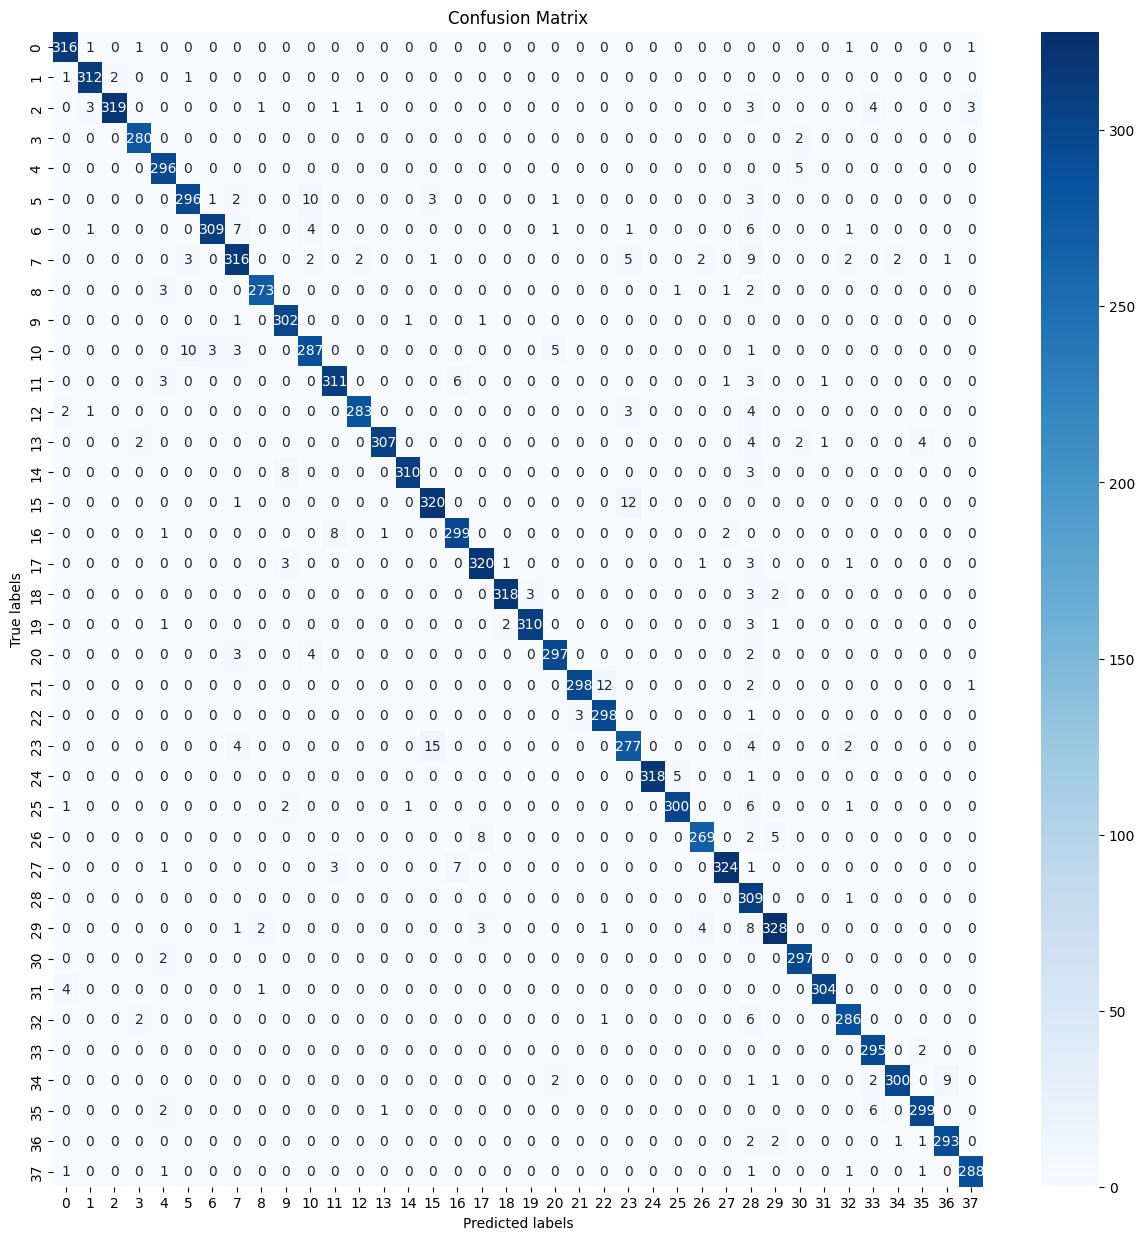

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       320
           1       0.98      0.99      0.98       316
           2       0.99      0.95      0.97       335
           3       0.98      0.99      0.99       282
           4       0.95      0.98      0.97       301
           5       0.95      0.94      0.95       316
           6       0.99      0.94      0.96       330
           7       0.93      0.92      0.93       345
           8       0.99      0.97      0.98       280
           9       0.96      0.99      0.97       305
          10       0.93      0.93      0.93       309
          11       0.96      0.96      0.96       325
          12       0.99      0.97      0.98       293
          13       0.99      0.96      0.98       320
          14       0.99      0.97      0.98       321
          15       0.94      0.96      0.95       333
          16       0.96      0.96      0.96       311
    

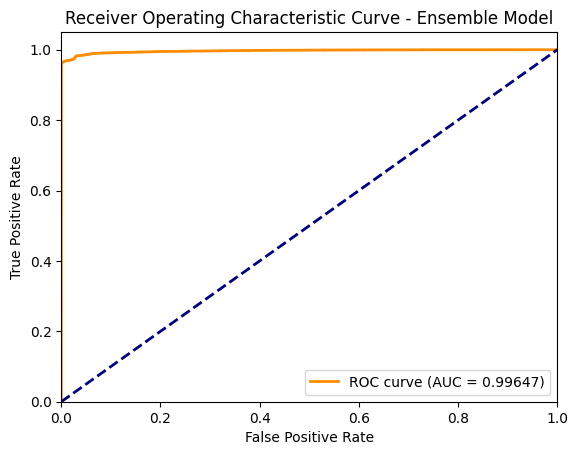

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
import numpy as np
import tensorflow as tf

# Assuming you have multiple models in a list
models = [model_1, model_2, model_3, model_4]  # Replace with your actual model variables

# Recheck Data Generators
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/arstbdsl/data',  # Make sure this directory is correct
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for consistency in predictions
)

# Evaluate each model on the test set and average their predictions
ensemble_predictions = None
test_loss = 0

for model in models:
    model_loss, model_acc = model.evaluate(test_generator, verbose=0)
    print(f'Model Accuracy: {model_acc * 100:.2f}%')
    
    # Summing losses for the ensemble
    test_loss += model_loss
    
    predictions = model.predict(test_generator)
    if ensemble_predictions is None:
        ensemble_predictions = predictions
    else:
        ensemble_predictions += predictions

# Average the predictions
ensemble_predictions /= len(models)
test_loss /= len(models)

# Evaluate the ensemble model
y_true = test_generator.classes
y_pred = np.argmax(ensemble_predictions, axis=1)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Print average loss for the ensemble
print("Ensemble Model Loss:", test_loss)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Calculate overall ROC AUC score
roc_auc = roc_auc_score(tf.keras.utils.to_categorical(y_true), ensemble_predictions, average='macro')
print("Overall ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true).ravel(), ensemble_predictions.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.show()